<a href="https://colab.research.google.com/github/yonaan/PPG-BP/blob/preprocess/p040057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040057.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.469208  0.442815  0.416422  0.391984  0.367546  0.346041  0.324536   

          7         8        9  ...      4192      4193      4194      4195  \
0  0.304985  0.290323  0.27957  ...  0.386119  0.381232  0.376344  0.372434   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.371457  0.373412  0.378299  0.386119       110.375      59.743107  

[1 rows x 4202 columns]
[110.375]  /  [59.74310662]
          0         1         2         3         4         5         6  \
0  0.469208  0.442815  0.416422  0.391984  0.367546  0.346041  0.324536   

          7         8        9  ...      4190      4191      4192      4193  \
0  0.304985  0.290323  0.27957  ...  0.397849  0.391984  0.386119  0.381232   

       4194      4195      4196      4197      4198      4199  
0  0.376344  0.372434  0.371457  0.373412  0.378299  0.386119  

[1 rows x 4200 columns]


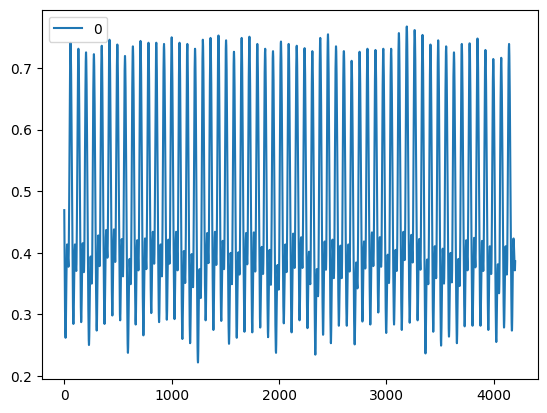

In [77]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [78]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

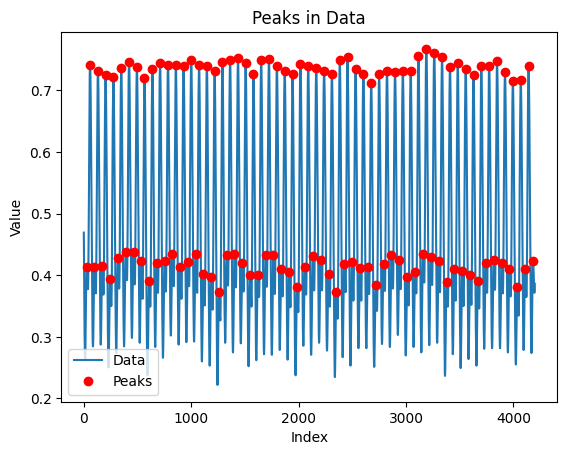

{'indices': array([  26,   58,   99,  131,  171,  203,  245,  276,  317,  349,  390,
        421,  463,  494,  535,  565,  608,  639,  679,  710,  752,  784,
        824,  856,  897,  929,  969, 1000, 1041, 1073, 1113, 1146, 1186,
       1218, 1259, 1290, 1331, 1362, 1403, 1436, 1475, 1507, 1549, 1580,
       1621, 1652, 1693, 1724, 1765, 1798, 1839, 1871, 1912, 1944, 1986,
       2017, 2058, 2089, 2132, 2164, 2205, 2237, 2279, 2310, 2352, 2384,
       2425, 2456, 2497, 2530, 2571, 2603, 2645, 2676, 2718, 2750, 2791,
       2823, 2865, 2898, 2938, 2971, 3012, 3044, 3085, 3116, 3158, 3190,
       3231, 3262, 3304, 3336, 3378, 3410, 3450, 3482, 3524, 3556, 3597,
       3629, 3670, 3702, 3743, 3774, 3816, 3848, 3890, 3922, 3963, 3995,
       4037, 4069, 4110, 4142, 4183]), 'values': array([0.41348974, 0.74095797, 0.41348974, 0.7311828 , 0.41544477,
       0.72531769, 0.39393939, 0.72238514, 0.42815249, 0.73607038,
       0.43695015, 0.74584555, 0.43792766, 0.73802542, 0.42228739,
       0

In [79]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [81]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, 0.7409579667644184, None, 0.7311827956989247, None, 0.7253176930596286, None, 0.7223851417399805, None, 0.7360703812316716, None, 0.7458455522971652, None, 0.7380254154447703, None, 0.7194525904203324, None, 0.7350928641251222, None, 0.7438905180840665, None, 0.7409579667644184, None, 0.7409579667644184, None, 0.7390029325513197, None, 0.7497556207233627, None, 0.7409579667644184, None, 0.7390029325513197, None, 0.7311827956989247, None, 0.7458455522971652, None, 0.7487781036168133, None, 0.7526881720430108, None, 0.7448680351906158, None, 0.7262952101661779, None, 0.7487781036168133, None, 0.750733137829912, None, 0.7390029325513197, None, 0.7311827956989247, None, 0.7272727272727273, None, 0.7429130009775171, None, 0.7390029325513197, None, 0.7360703812316716, None, 0.7321603128054741, None, 0.7272727272727273, None, 0.7487781036168133, None, 0.7546432062561095, None, 0.7350928641251222, None, 0.7272727272727273, None, 0.7116324535679375, None, 0.7262952101661779, None, 0.7311

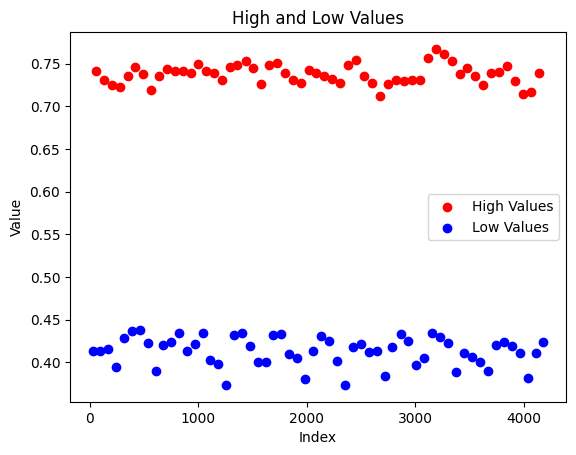

In [82]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [83]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.737682426986332
Average Low Value: 0.41311895371962115
